In [37]:
%matplotlib inline
# import some useful modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.api as sm
import os.path
import urllib
from matplotlib import pyplot

In [38]:
# load the data from https://www.dft.gov.uk/traffic-counts/cp.php?la=City+of+Edinburgh
DATA_URL = 'http://api.dft.gov.uk/v3/trafficcounts/export/la/City+of+Edinburgh.csv'
dname = os.path.basename(DATA_URL)
if not os.path.exists(dname):
    urllib.urlretrieve(DATA_URL,dname)

In [39]:
# load the data into a pandas frame
aadf = pd.read_csv('City+of+Edinburgh.csv')

In [40]:
# turn easting/northings into a geopandas geometry
geometry = [Point(xy) for xy in zip(aadf.Easting, aadf.Northing)]
aadf = aadf.drop(['Easting','Northing'],axis=1)
aadf = gpd.GeoDataFrame(aadf, crs={'init': 'epsg:27700'}, geometry=geometry)
# project dataset to lon/lat
aadf=aadf.to_crs({'init': 'epsg:4326'})

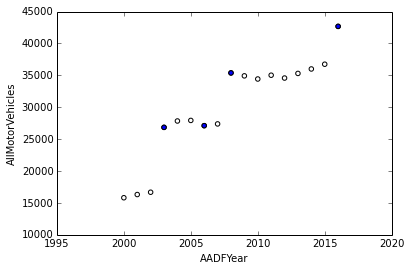

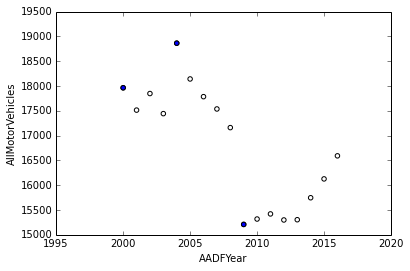

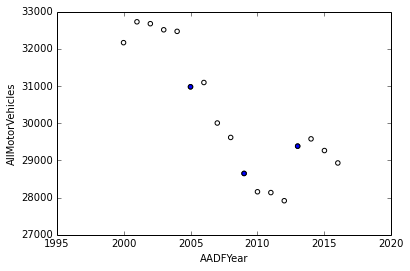

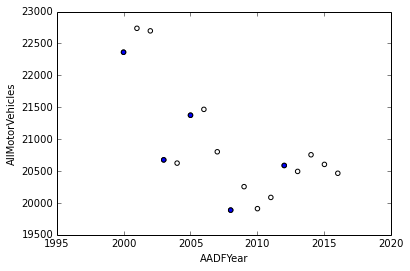

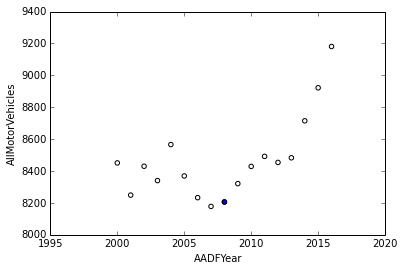

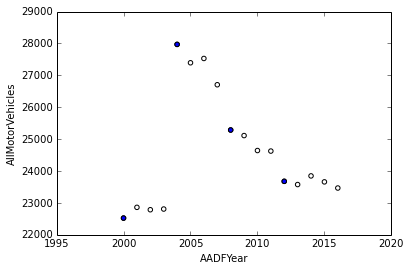

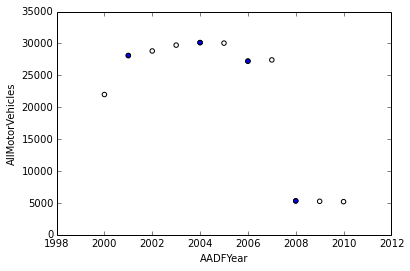

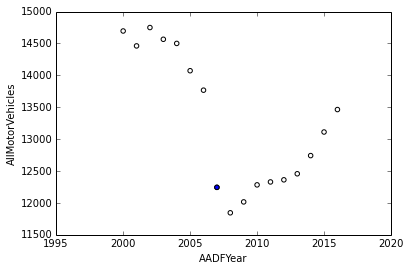

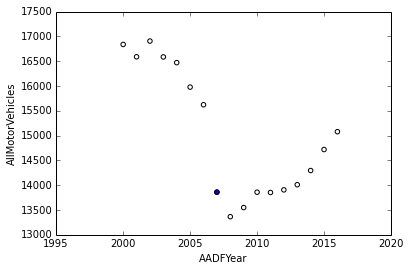

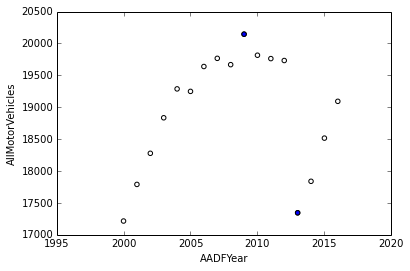

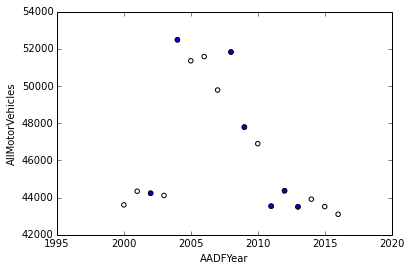

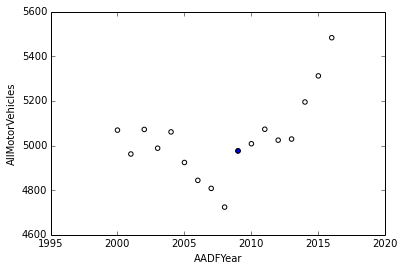

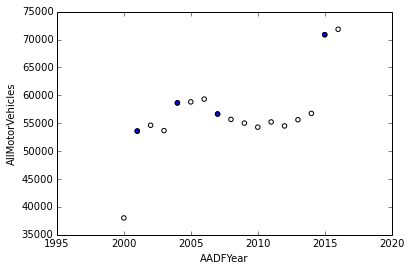

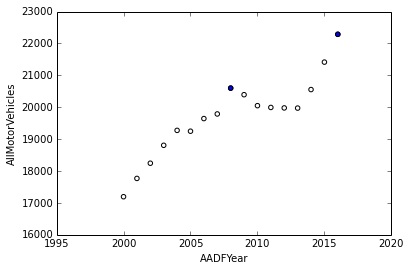

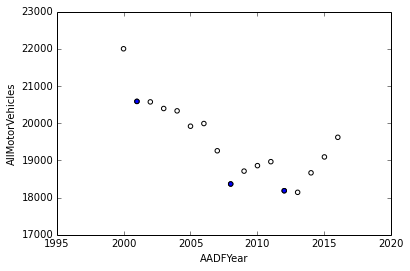

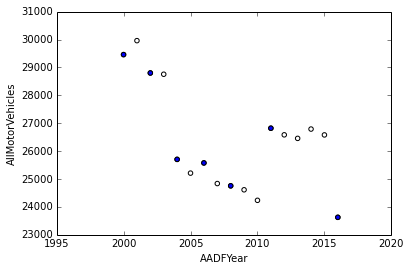

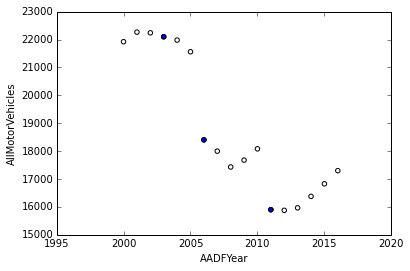

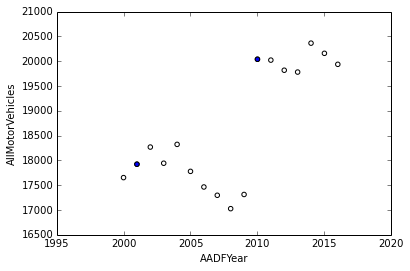

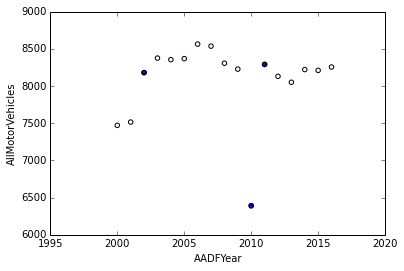

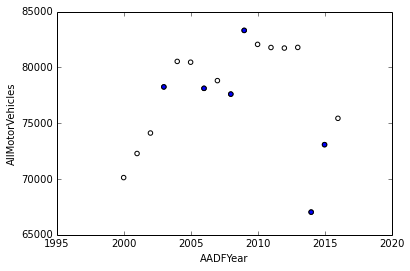

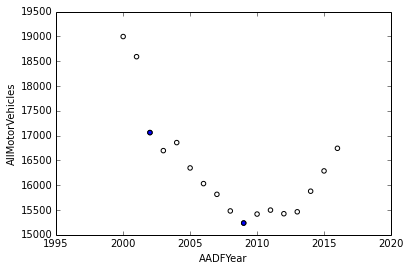

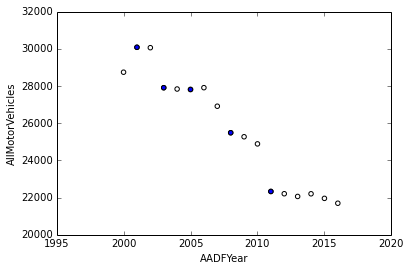

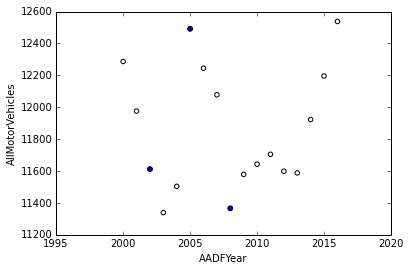

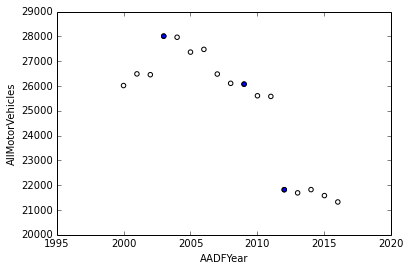

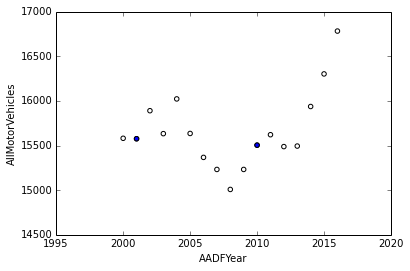

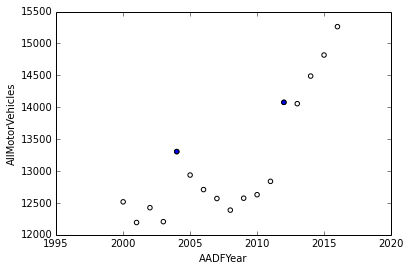

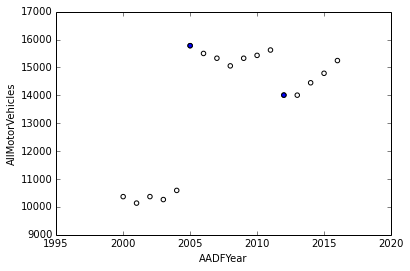

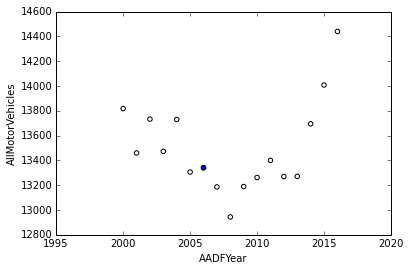

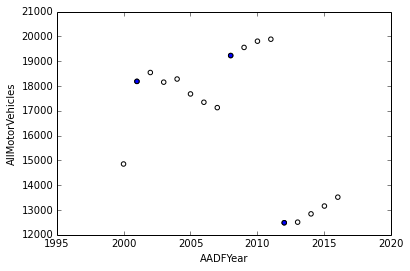

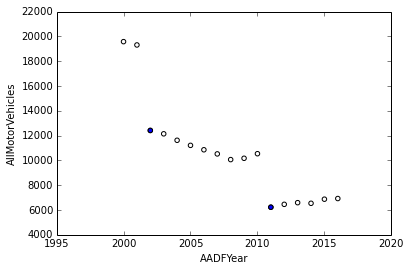

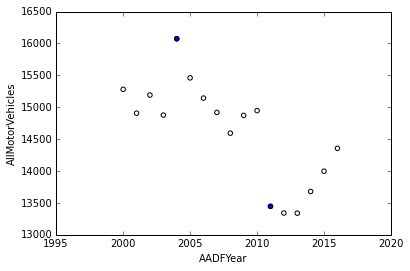

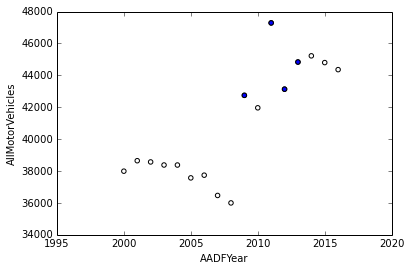

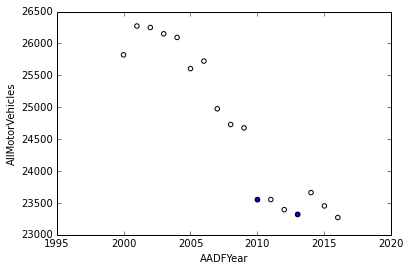

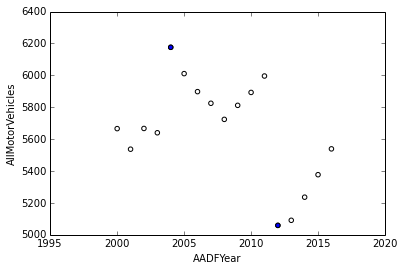

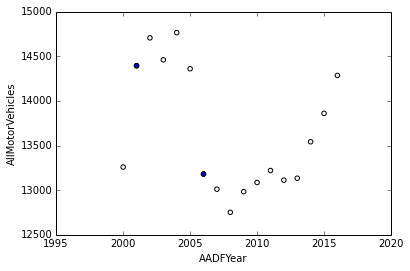

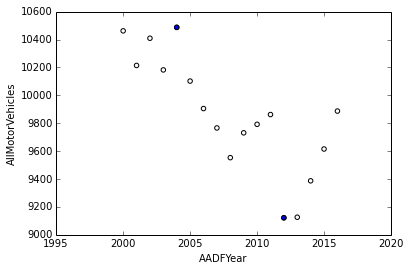

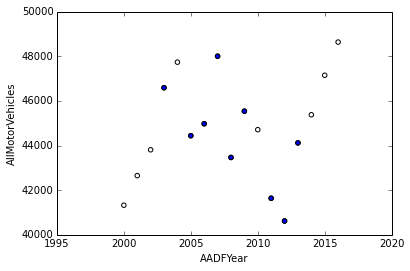

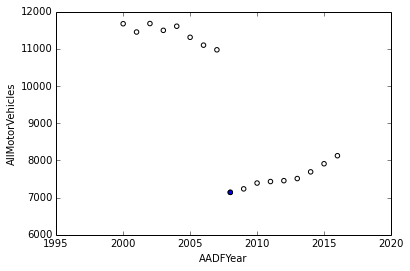

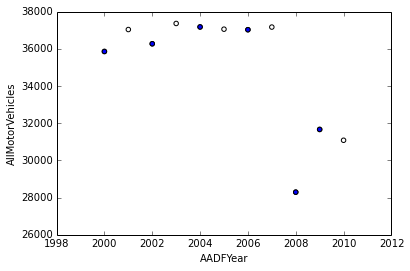

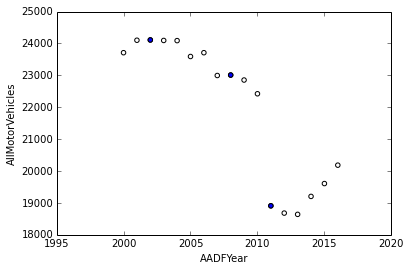

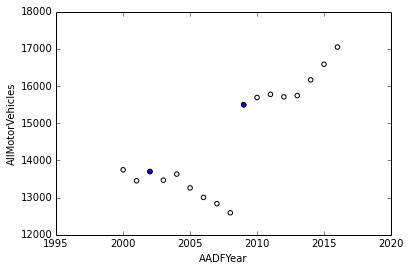

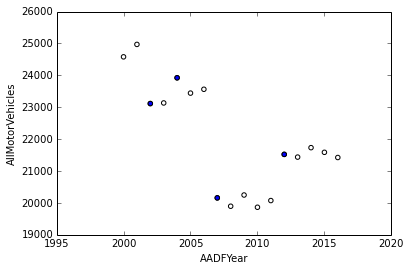

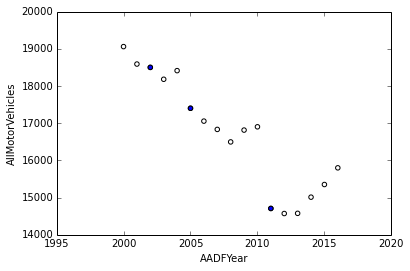

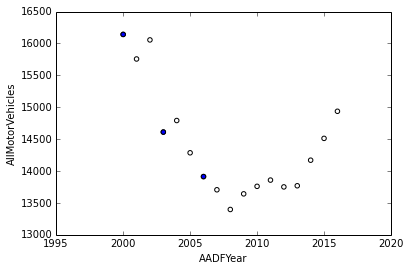

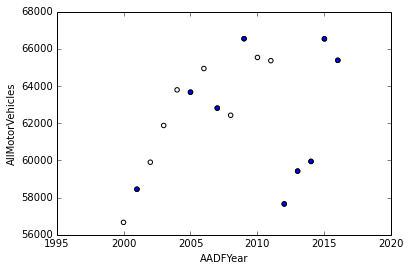

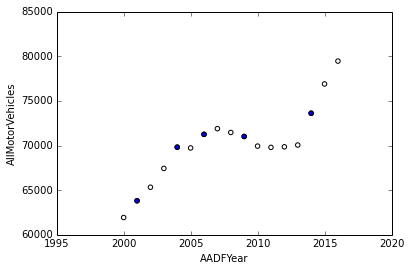

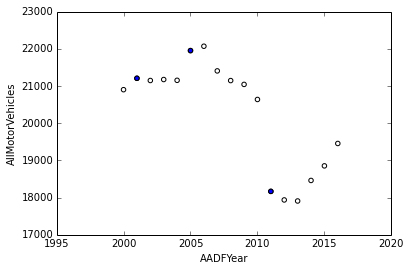

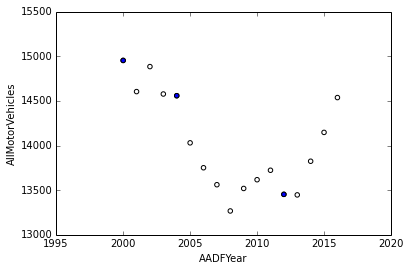

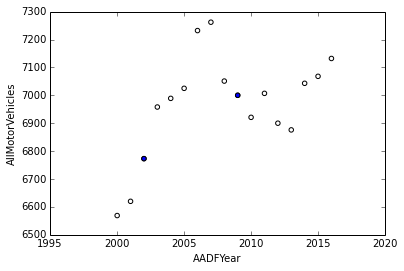

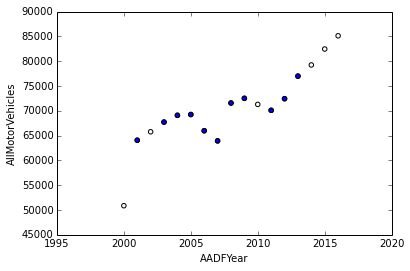

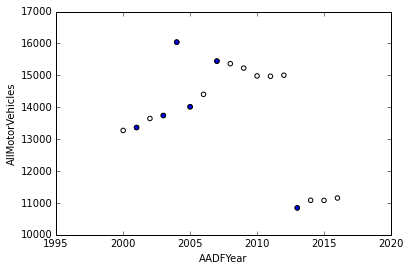

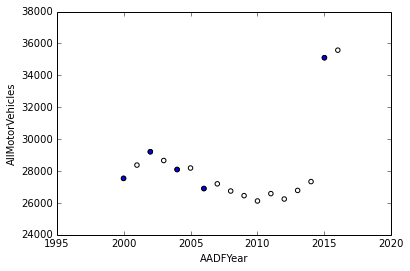

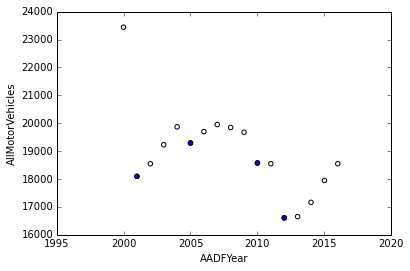

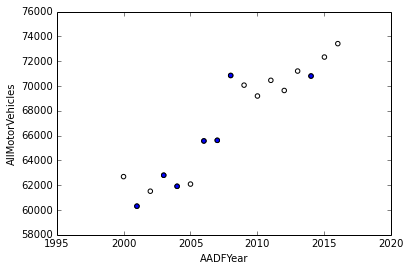

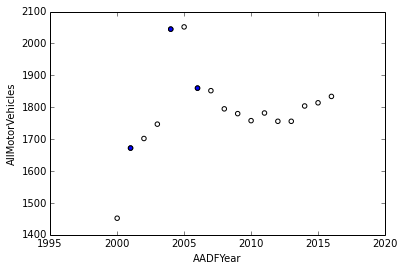

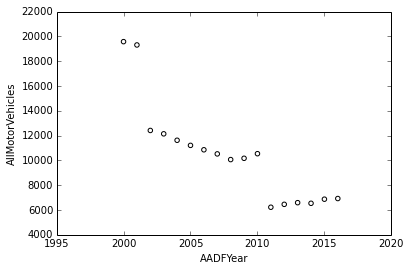

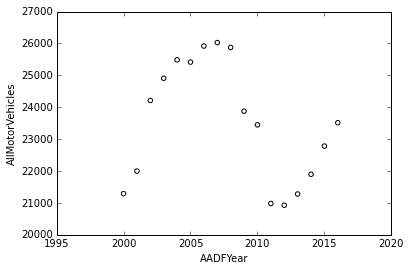

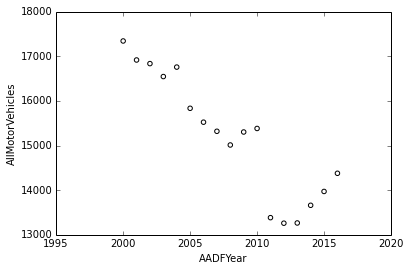

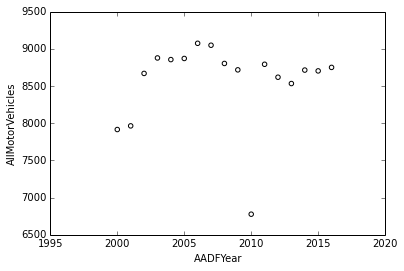

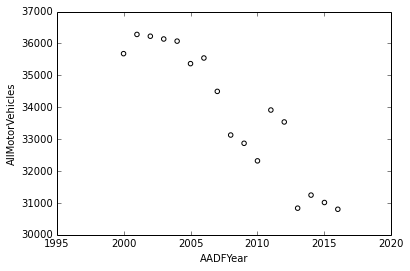

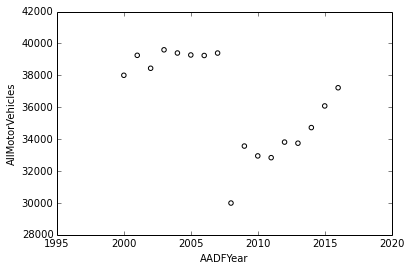

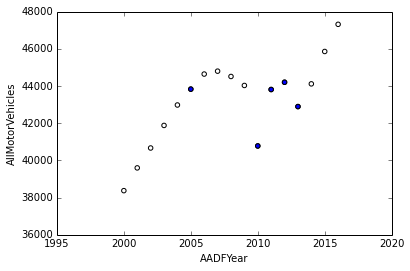

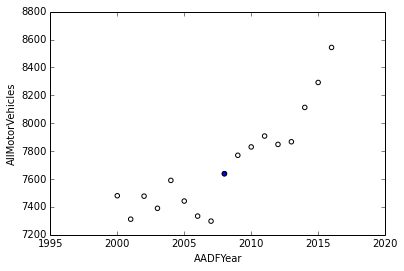

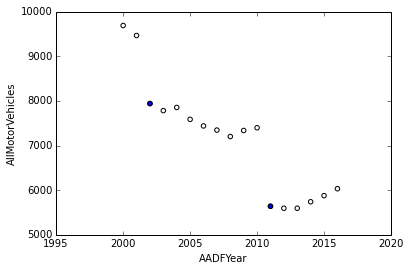

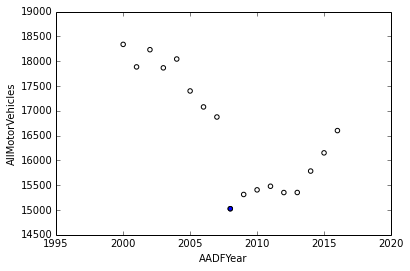

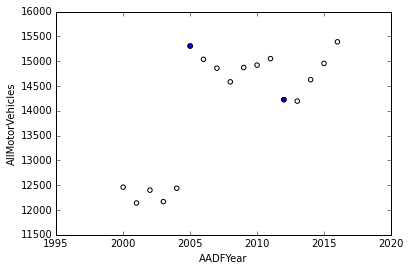

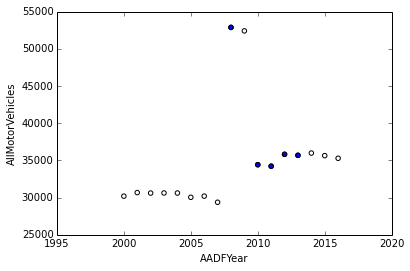

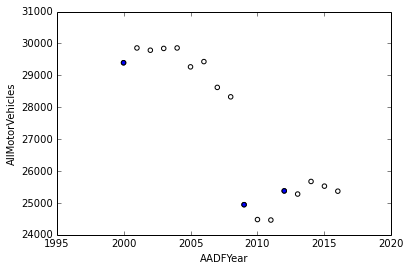

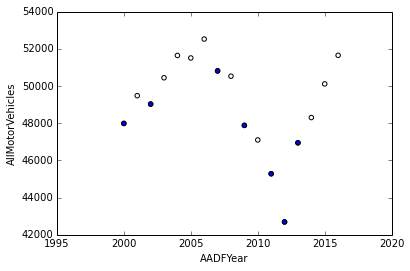

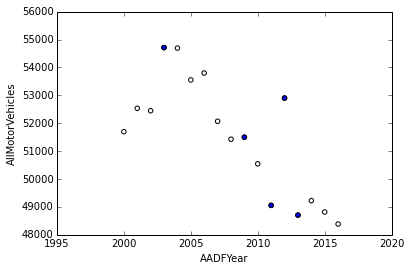

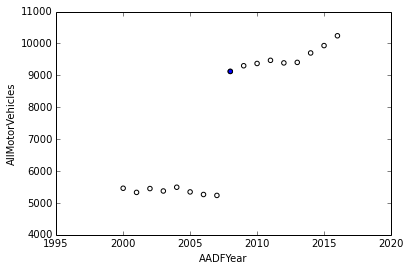

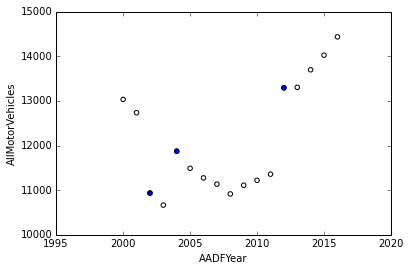

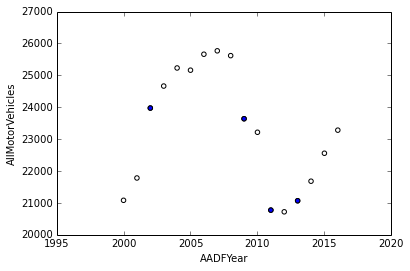

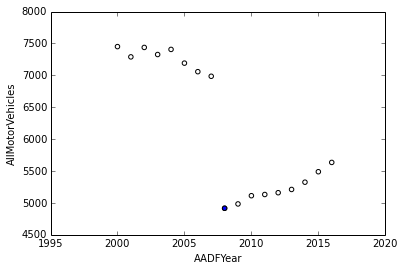

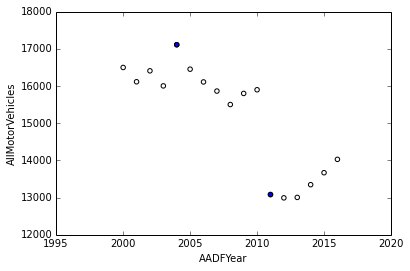

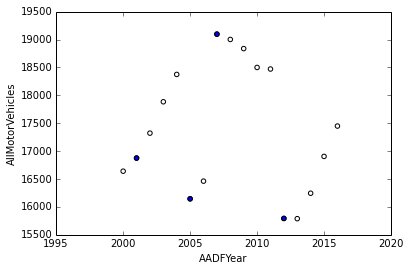

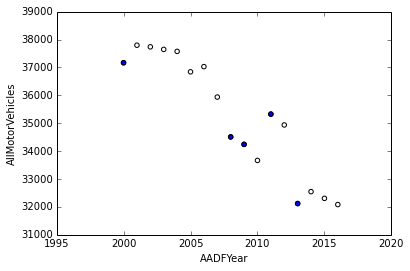

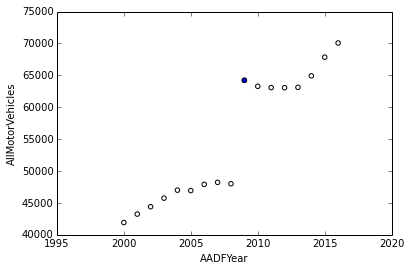

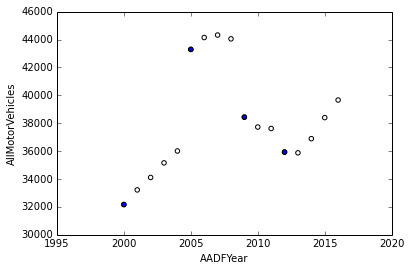

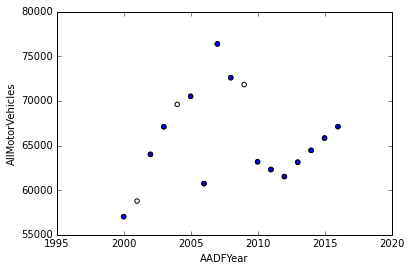

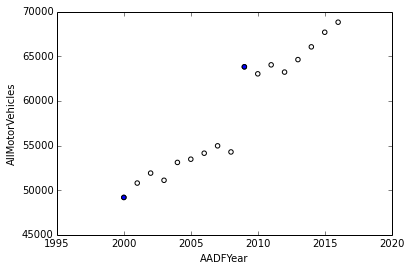

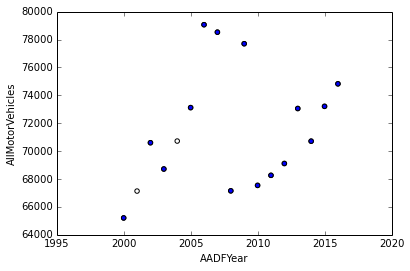

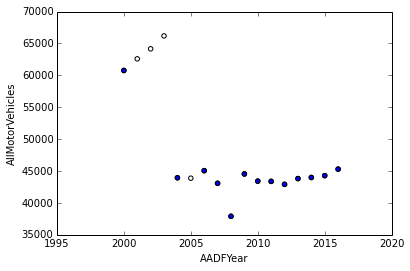

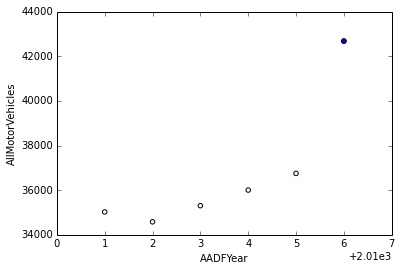

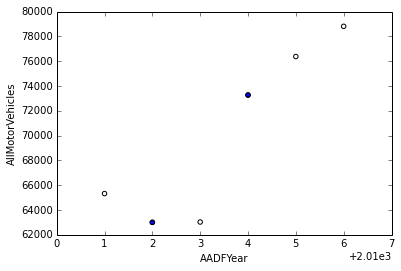

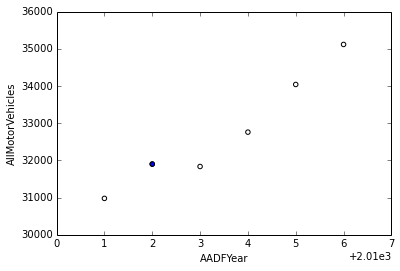

In [61]:
# plot all locations
for key, grp in aadf.groupby(['CP']):
    
    ax = grp[['AADFYear','AllMotorVehicles']].plot.scatter(x='AADFYear',y='AllMotorVehicles',facecolor='none')
    try:
        grp[grp.Estimation_method=='Counted'][['AADFYear','AllMotorVehicles']].plot.scatter(x='AADFYear',y='AllMotorVehicles',ax=ax)
    except:
        pass